In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline
import Fish_data

In [2]:
f = Fish_data.Fish()

In [3]:
df = f.get_fish_data()

In [4]:
#fix weights
weight = df[['Relative weight']]
weight = weight.fillna(0)
df['new_weight'] = weight

In [5]:
#fix dates
from datetime import datetime
datetime_object = datetime.strptime('1700-3-01', '%Y-%m-%d')
df['new_date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M', errors='coerce')
df = df[df['new_date'] > datetime_object]

In [6]:
df.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date
0,19710001,1971-03-09 00:00:00,1,GN,LMB,NaN,263,250.0,1.37,0.0,...,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0,0.0,1971-03-09
1,19710002,1971-03-09 00:00:00,1,GN,LMB,NaN,348,700.0,1.66,0.0,...,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0,0.0,1971-03-09
2,19710003,1971-03-09 00:00:00,1,GN,LMB,NaN,332,555.0,1.51,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09
3,19710004,1971-03-09 00:00:00,1,GN,LMB,NaN,350,720.0,1.67,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09
4,19710005,1971-03-09 00:00:00,1,GN,LMB,NaN,300,455.0,1.68,0.0,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,0.0,1971-03-09


# Visualize missing data (assume 0 are nan) 
Note that we assume a 0 weight meant that there actually was no weight recoreded.

In [7]:
newdf = df.drop(df.columns.difference(['Relative weight', "FishID"]), 1)

In [8]:
newdf.replace(0, np.nan, inplace=True)

In [9]:
newdf.head()

,FishID,Relative weight
0,19710001,NaN
1,19710002,NaN
2,19710003,NaN
3,19710004,NaN
4,19710005,NaN


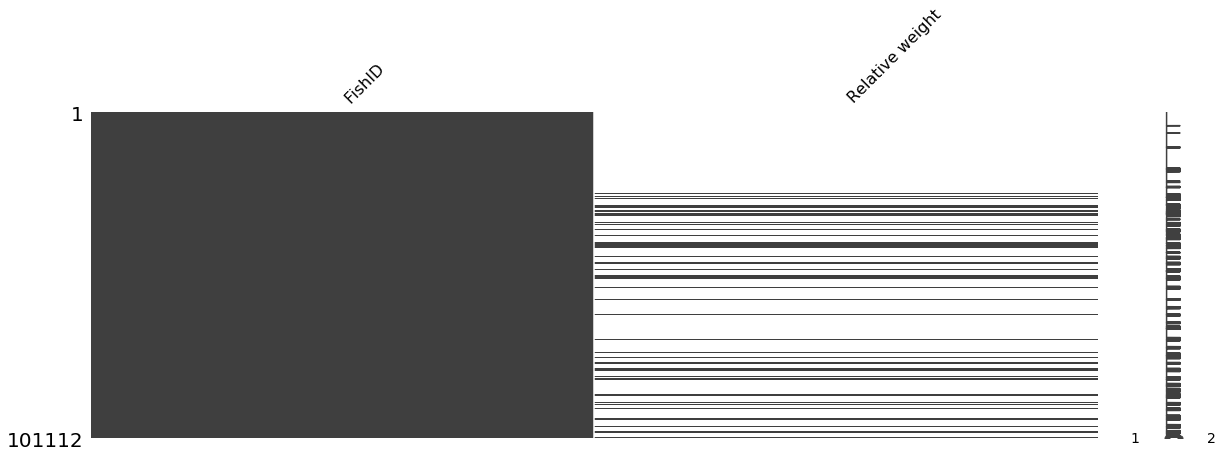

In [10]:
mno.matrix(newdf, figsize = (20, 6))

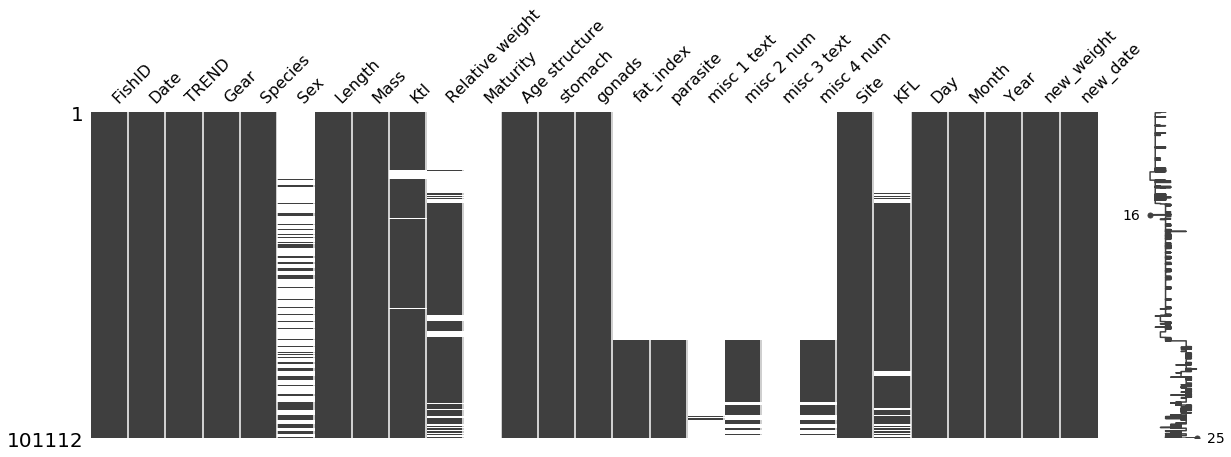

In [11]:
mno.matrix(df, figsize = (20, 6))

# View STB and SMB across time

In [12]:
STBspecies = df.loc[(df['Species'] == "STB") | (df['Species'] == "stb")]

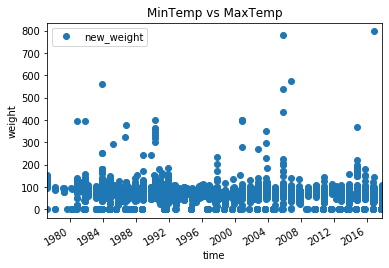

In [13]:
STBspecies.plot(x='new_date', y='new_weight', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('weight')  
plt.show()

In [27]:
SMBspecies = df.loc[(df['Species'] == "SMB") | (df['Species'] == "smb")]

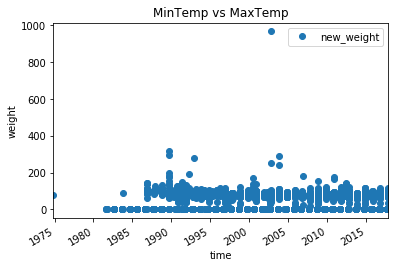

In [29]:
SMBspecies.plot(x='new_date', y='new_weight', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('weight')  
plt.show()

# Imputing Data

Initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.

The function random_imputation replaces the missing values with some random observed values of the variable. The method is repeated for all the variables containing missing values, after which they serve as parameters in the regression model to estimate other variable values.

In [15]:
import numpy as np
from sklearn.impute import SimpleImputer

In [16]:
dfna = df.replace(0, np.nan)

In [17]:
dfna.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date
0,19710001,1971-03-09,1.0,GN,LMB,NaN,263.0,250.0,1.37,NaN,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,NaN,1971-03-09
1,19710002,1971-03-09,1.0,GN,LMB,NaN,348.0,700.0,1.66,NaN,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,NaN,1971-03-09
2,19710003,1971-03-09,1.0,GN,LMB,NaN,332.0,555.0,1.51,NaN,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,NaN,1971-03-09
3,19710004,1971-03-09,1.0,GN,LMB,NaN,350.0,720.0,1.67,NaN,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,NaN,1971-03-09
4,19710005,1971-03-09,1.0,GN,LMB,NaN,300.0,455.0,1.68,NaN,...,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0,NaN,1971-03-09


# Impute for STB

In [18]:
STBspeciesna = dfna.loc[(dfna['Species'] == "STB") | (dfna['Species'] == "stb")]

In [19]:
STBspeciesna.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date
4200,19770087,1977-03-24,1.0,GN,STB,NaN,421.0,900.0,1.20,NaN,...,NaN,NaN,NaN,PB,1.0,24.0,3.0,1977.0,NaN,1977-03-24
4201,19770088,1977-03-24,1.0,GN,STB,NaN,463.0,1180.0,1.18,96.0,...,NaN,NaN,NaN,PB,1.0,24.0,3.0,1977.0,96.0,1977-03-24
4202,19770089,1977-03-23,1.0,GN,STB,NaN,320.0,500.0,1.52,123.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,123.0,1977-03-23
4203,19770090,1977-03-23,1.0,GN,STB,NaN,310.0,525.0,1.76,142.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,142.0,1977-03-23
4204,19770091,1977-03-23,1.0,GN,STB,NaN,375.0,900.0,1.70,137.0,...,NaN,NaN,NaN,RN,2.0,23.0,3.0,1977.0,137.0,1977-03-23


In [20]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean" )
imp.fit(STBspecies["Relative weight"].to_numpy().reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'
STBspeciesna["imputed"] = imp.transform(STBspeciesna["Relative weight"].to_numpy().reshape(-1, 1))


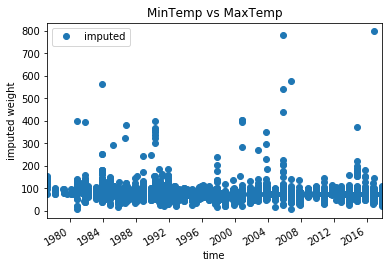

In [23]:
STBspeciesna.plot(x='new_date', y='imputed', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('imputed weight')  
plt.show()

In [45]:
# newdf = df.drop(STBspeciesna.columns.difference(['Relative weight', "FishID", 'imputed']), 1)
# mno.matrix(newdf, figsize = (20, 6))

# Impute SMB

In [37]:
SMBspeciesna = dfna.loc[(dfna['Species'] == "SMB") | (dfna['Species'] == "smb")]

In [43]:
SMBspeciesna.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year,new_weight,new_date,imputed
20138,19812061,1981-09-04,1.0,EL,SMB,NaN,80.0,NaN,NaN,NaN,...,NaN,NaN,BF,NaN,4.0,9.0,1981.0,NaN,1981-09-04,31.911093
20139,19812062,1981-09-04,1.0,EL,SMB,NaN,69.0,NaN,NaN,NaN,...,NaN,NaN,BF,NaN,4.0,9.0,1981.0,NaN,1981-09-04,31.911093
20140,19812063,1981-09-04,1.0,EL,SMB,NaN,82.0,NaN,NaN,NaN,...,NaN,NaN,BF,NaN,4.0,9.0,1981.0,NaN,1981-09-04,31.911093
20448,19812371,1981-08-31,1.0,EL,SMB,NaN,105.0,NaN,NaN,NaN,...,NaN,NaN,RN,NaN,31.0,8.0,1981.0,NaN,1981-08-31,31.911093
20909,19812832,1981-08-29,1.0,EL,SMB,NaN,94.0,NaN,NaN,NaN,...,NaN,NaN,SJ,NaN,29.0,8.0,1981.0,NaN,1981-08-29,31.911093


In [39]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean" )
imp.fit(SMBspecies["Relative weight"].to_numpy().reshape(-1, 1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [40]:
pd.options.mode.chained_assignment = None  # default='warn'
SMBspeciesna["imputed"] = imp.transform(SMBspeciesna["Relative weight"].to_numpy().reshape(-1, 1))

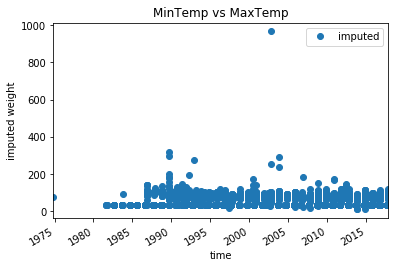

In [42]:
SMBspeciesna.plot(x='new_date', y='imputed', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('time')  
plt.ylabel('imputed weight')  
plt.show()

In [46]:
# newdf = df.drop(SMBspeciesna.columns.difference(['Relative weight', "FishID", 'imputed']), 1)
# mno.matrix(newdf, figsize = (20, 6))

# Linear Regression